In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

df = pd.read_csv("database/diem_thi_thpt_2023.csv")
df

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1
...,...,...,...,...,...,...,...,...,...,...,...
1022055,64006933,7.8,6.75,5.4,NaN,NaN,NaN,8.50,7.75,9.75,N1
1022056,64006934,7.4,7.50,6.0,6.0,5.75,6.25,NaN,NaN,NaN,N1
1022057,64006935,6.4,7.00,3.0,NaN,NaN,NaN,5.50,5.75,7.25,N1
1022058,64006936,6.6,7.00,5.8,NaN,NaN,NaN,6.50,6.50,9.25,N1


In [288]:
df_tn = df[(df['toan'] >= 0) & (df['vat_li'] >= 0) & (df['hoa_hoc'] >= 0) & (df['sinh_hoc'] >= 0)]
df_tn['toan'].corr(df_tn['ngoai_ngu'])


0.38981651749785634

In [267]:
def group_data(df, name, sbd = "sbd"):
    # lọc dữ liệu >= 0, và nếu là ngoại ngữ thì lọc ngoại ngữ N1
    df = df[df[name] >= 0]
    if name == "ngoai_ngu":
        df = df[df["ma_ngoai_ngu"] == "N1"]
    if name == "toan":
        df = df[df["vat_li"] >= 0]
        df = df[df["hoa_hoc"] >= 0]
        df = df[df["sinh_hoc"] >= 0]
        df = df[df["ngu_van"] >= 0]
    if name == "ngu_van":
        df = df[df["lich_su"] >= 0]
        df = df[df["dia_li"] >= 0]
        df = df[df["gdcd"] >= 0]
    df = df[[sbd, name]]
    df = df.groupby([name]).count()
    df = df.reset_index()
    df = df.rename(columns={sbd: "count"})
    return df

def group_data2(df, name, sbd = "sbd"):
    # lọc dữ liệu >= 0, và nếu là ngoại ngữ thì lọc ngoại ngữ N1
    df = df[df[name] >= 0]
    if name == "ngoai_ngu":
        df = df[df["ma_ngoai_ngu"] == "N1"]
    if name == "ngu_van":
        df = df[df["vat_li"] >= 0]
        df = df[df["hoa_hoc"] >= 0]
        df = df[df["sinh_hoc"] >= 0]
    if name == "toan":
        df = df[df["lich_su"] >= 0]
        df = df[df["dia_li"] >= 0]
        df = df[df["gdcd"] >= 0]
    df = df[[sbd, name]]
    df = df.groupby([name]).count()
    df = df.reset_index()
    df = df.rename(columns={sbd: "count"})
    return df
def plot_data(df, name, year = 2023, increment = 0.25):
    df1 = group_data(df, name)
    df2 = group_data2(df, name)
    x1 = df1[name]
    y1 = df1["count"]
    x2 = df2[name]
    y2 = df2["count"]
    fig, ax = plt.subplots(figsize=(20, 15))
    plt.xlabel("Điểm")
    plt.ylabel("Số lượng thí sinh")
    plt.title("Biểu đồ phổ điểm thi THPT môn " + name + " năm " + str(year))
    plt.xticks(np.arange(0, 10 + increment, increment))
    plt.bar(x1, y1, width = 0.17)
    plt.bar(x2, y2, width = 0.17, alpha = 0.5, color= "red")
    ax.bar_label(ax.containers[0], rotation=90, padding=3)
    ax.bar_label(ax.containers[1], rotation=90, padding=3)
    # thêm chú thích
    plt.legend(["Chuyên văn", "Chuyên toán"], loc = "upper right")
    
    plt.show()


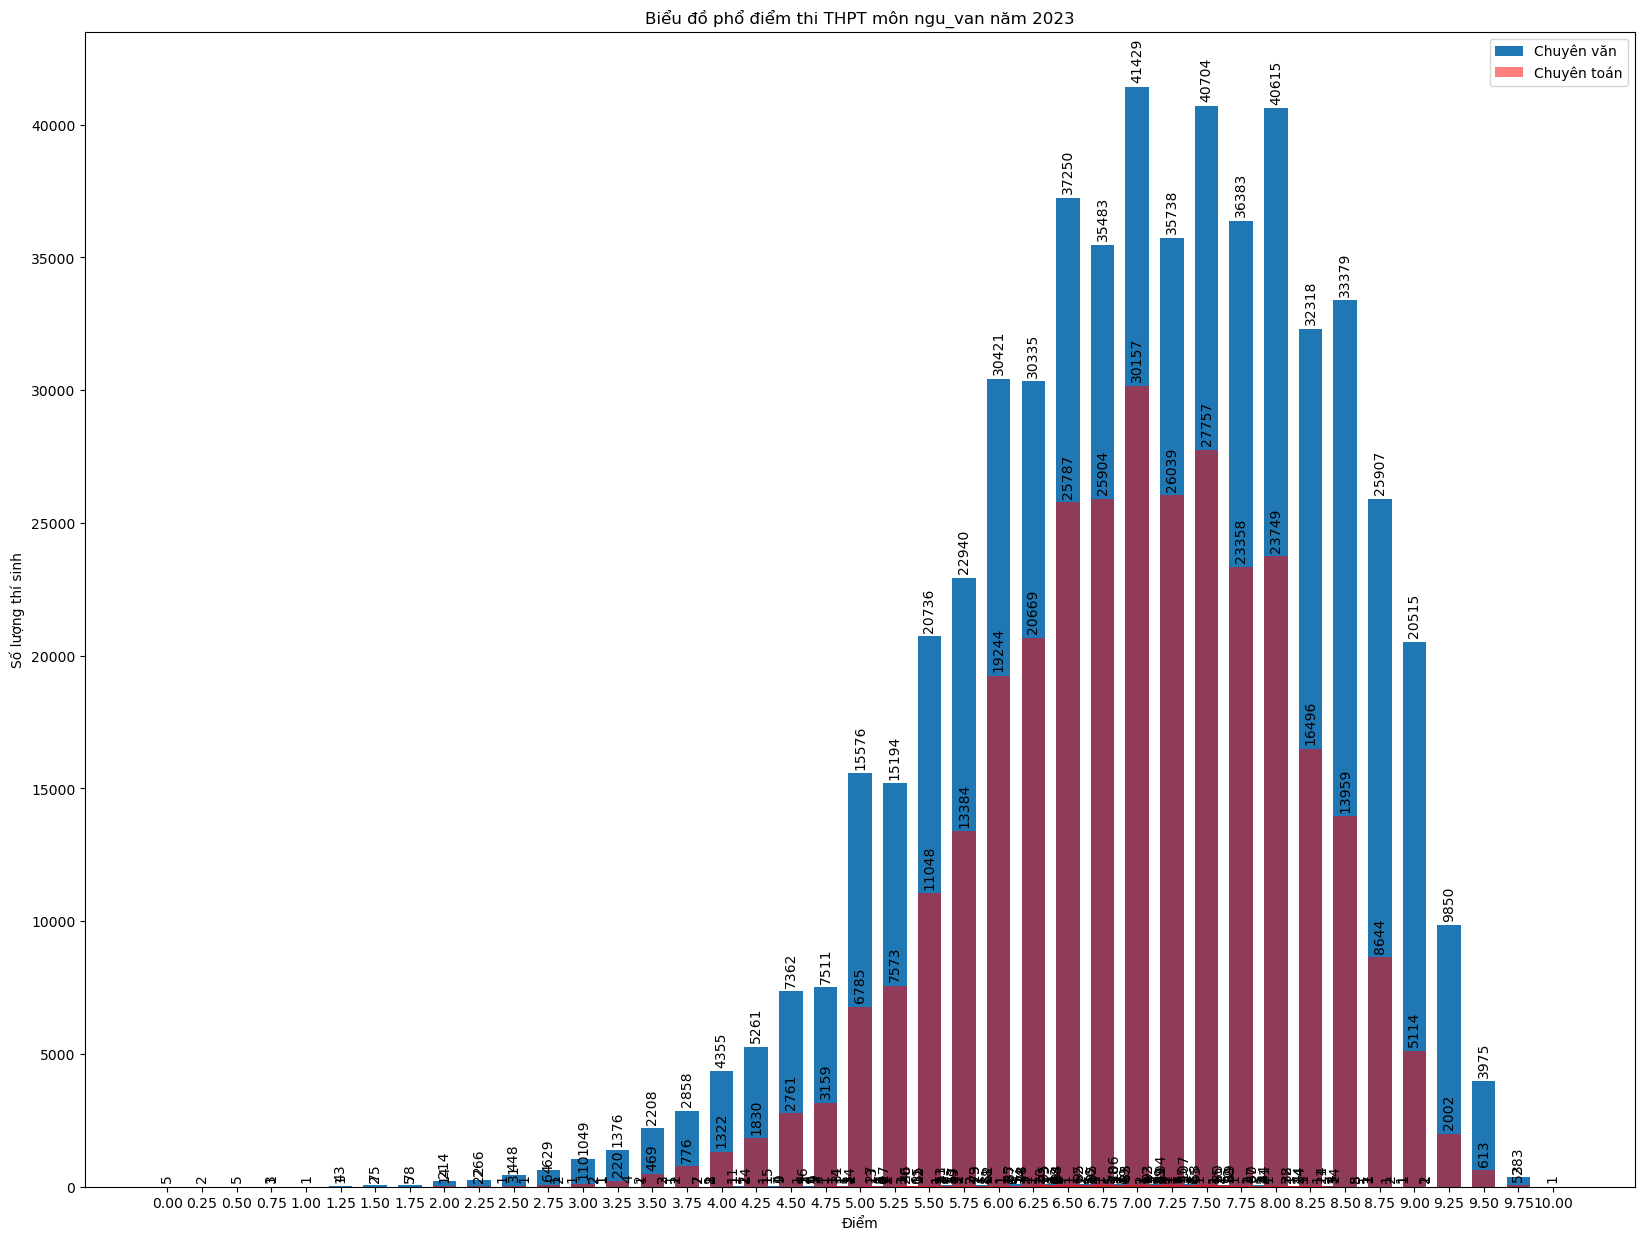

In [268]:
plot_data(df, "ngu_van")

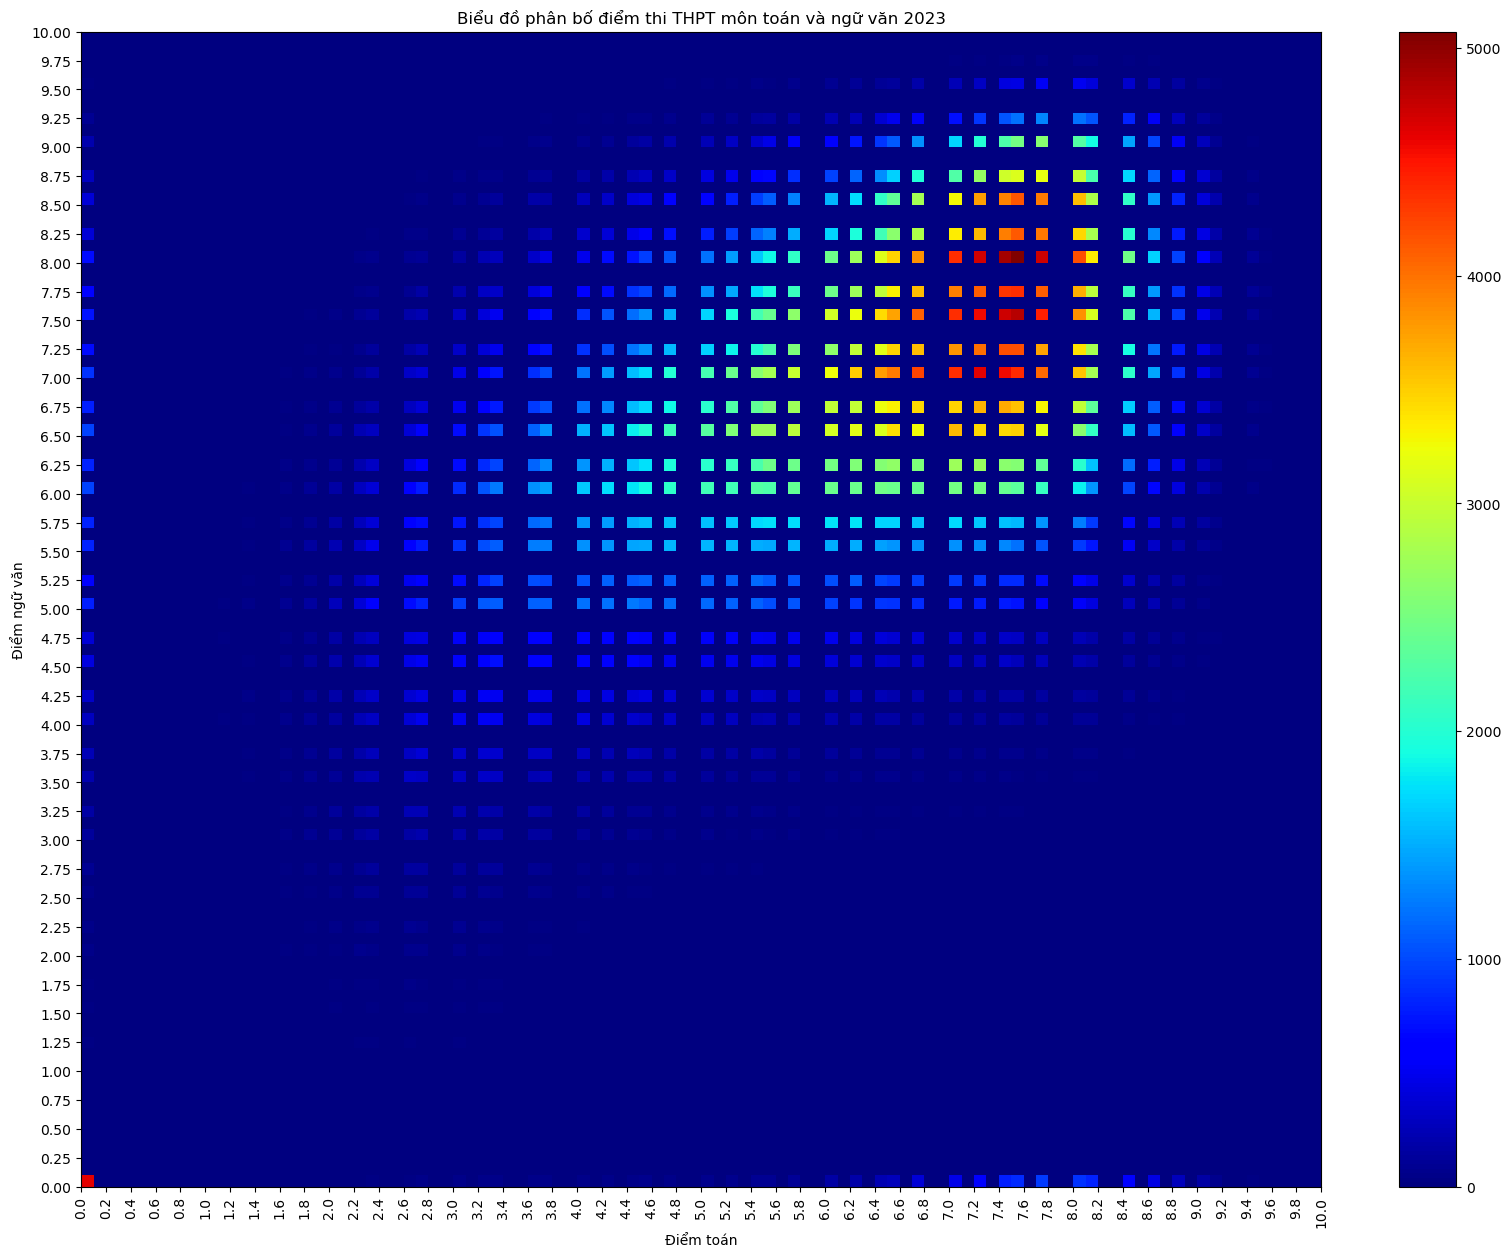

In [269]:
#check if 2 data math and literature is linear relationship
# make a heatmap to check if 2 data math and literature is linear relationship
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
plt.xlabel('Điểm toán')
plt.ylabel('Điểm ngữ văn')
plt.title('Biểu đồ phân bố điểm thi THPT môn toán và ngữ văn 2023')
plt.xticks(np.arange(0, 10 + 0.2, 0.2), rotation=90)
plt.yticks(np.arange(0, 10 + 0.25, 0.25))
x = df['toan'].fillna(0)
y = df['ngu_van'].fillna(0)
plt.hist2d(x, y, bins= 100, cmap=plt.cm.jet)
plt.colorbar()
plt.show()


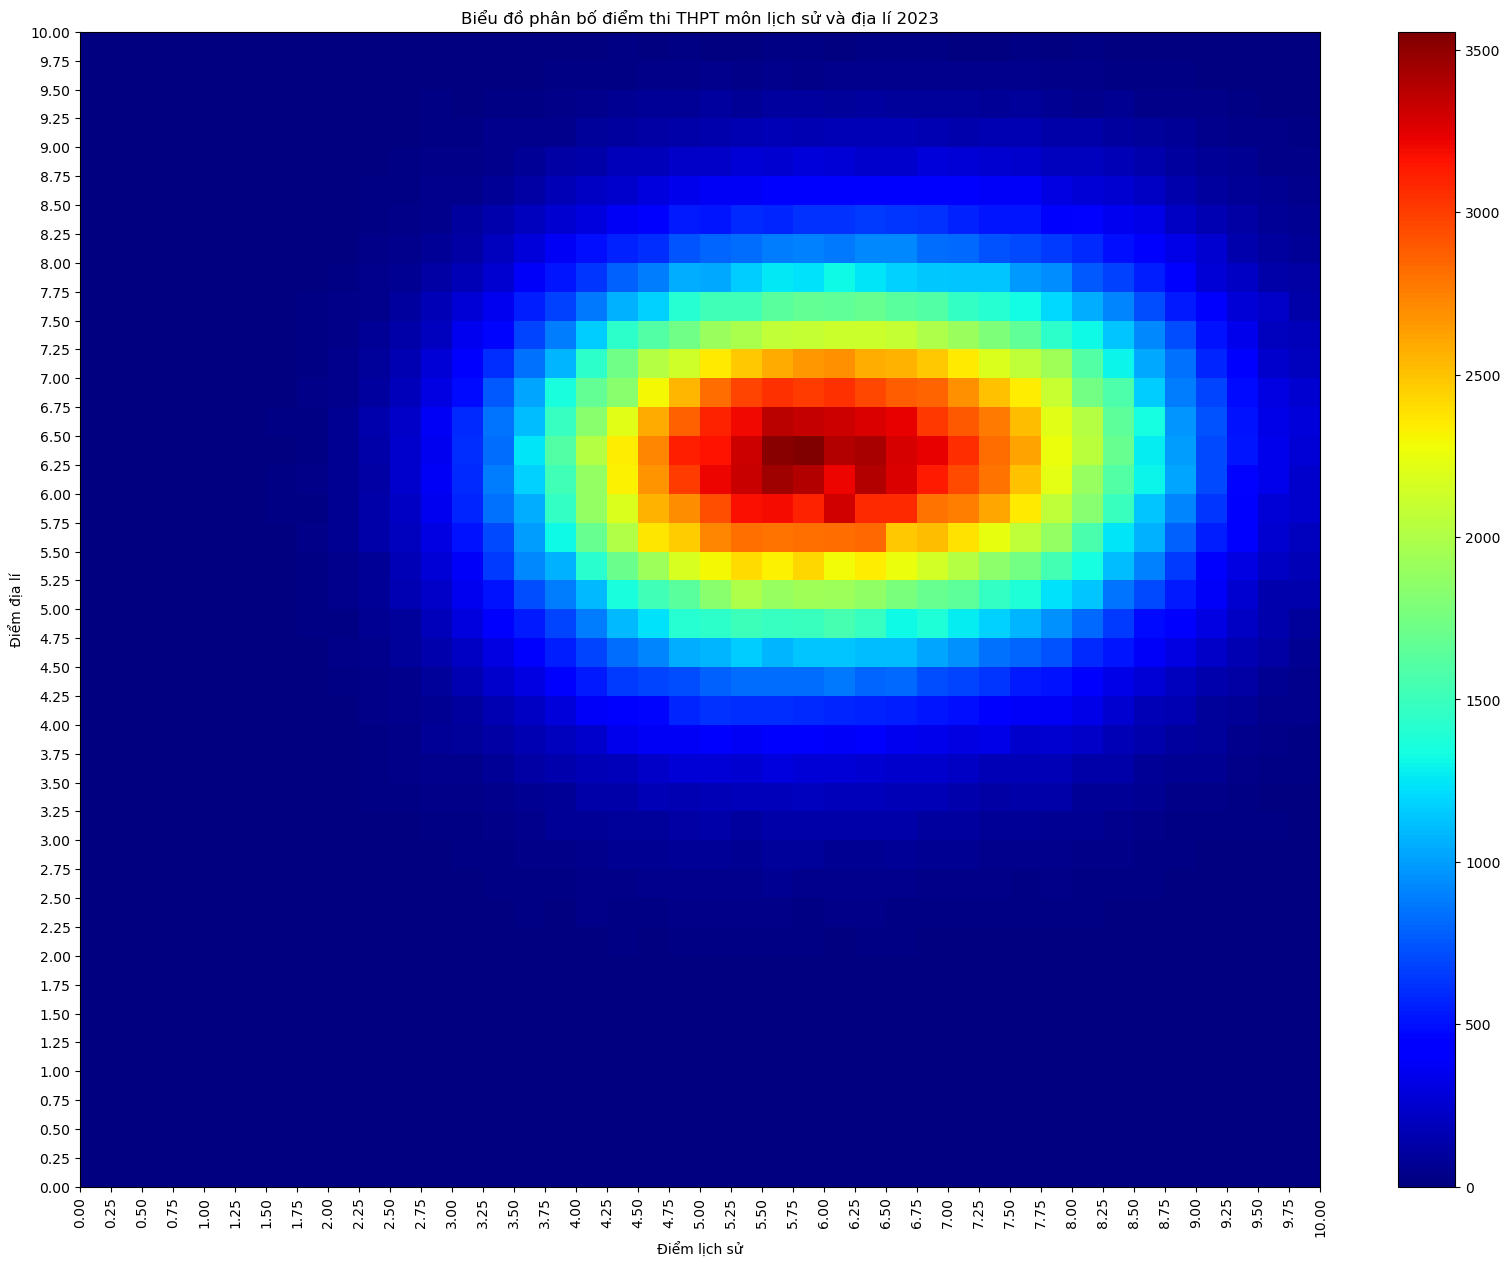

0.6082057948905933

In [270]:
#check if 2 data math and literature is linear relationship
# make a heatmap to check if 2 data math and literature is linear relationship
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 15))
plt.xlabel('Điểm lịch sử')
plt.ylabel('Điểm địa lí')
plt.title('Biểu đồ phân bố điểm thi THPT môn lịch sử và địa lí 2023')
plt.xticks(np.arange(0, 10 + 0.25, 0.25), rotation=90)
plt.yticks(np.arange(0, 10 + 0.25, 0.25))
x = df['lich_su'].dropna()
y = df['dia_li'].dropna()
# make x and y have the same length
x = x[:len(y)]
plt.hist2d(x, y, bins= 40, cmap=plt.cm.jet)
plt.colorbar()
plt.show()
x.corr(y)

In [271]:

list_corr = {
    'toan - ngu_van': df['toan'].corr(df['ngu_van']),
    'toan - vat_li': df['toan'].corr(df['vat_li']),
    'toan - hoa_hoc': df['toan'].corr(df['hoa_hoc']),
    'toan - sinh_hoc': df['toan'].corr(df['sinh_hoc']),
    'toan - lich_su': df['toan'].corr(df['lich_su']),
    'toan - dia_li': df['toan'].corr(df['dia_li']),
    'toan - gdcd': df['toan'].corr(df['gdcd']),
    'ngu_van - vat_li': df['ngu_van'].corr(df['vat_li']),
    'ngu_van - hoa_hoc': df['ngu_van'].corr(df['hoa_hoc']),
    'ngu_van - sinh_hoc': df['ngu_van'].corr(df['sinh_hoc']),
    'ngu_van - lich_su': df['ngu_van'].corr(df['lich_su']),
    'ngu_van - dia_li': df['ngu_van'].corr(df['dia_li']),
    'ngu_van - gdcd': df['ngu_van'].corr(df['gdcd']),
    'vat_li - hoa_hoc': df['vat_li'].corr(df['hoa_hoc']),
    'vat_li - sinh_hoc': df['vat_li'].corr(df['sinh_hoc']),
    'lich_su - dia_li': df['lich_su'].corr(df['dia_li']),
    'lich_su - gdcd': df['lich_su'].corr(df['gdcd']),
    'dia_li - gdcd': df['dia_li'].corr(df['gdcd'])
}
list_corr = sorted(list_corr.items(), key=lambda x: x[1], reverse=True)
# round to 2 decimal places
list_corr = [(x[0], round(x[1], 2)) for x in list_corr]
list_corr

[('lich_su - dia_li', 0.61),
 ('lich_su - gdcd', 0.58),
 ('toan - vat_li', 0.57),
 ('dia_li - gdcd', 0.57),
 ('toan - gdcd', 0.5),
 ('ngu_van - gdcd', 0.48),
 ('toan - lich_su', 0.47),
 ('toan - hoa_hoc', 0.46),
 ('toan - ngu_van', 0.46),
 ('ngu_van - lich_su', 0.45),
 ('toan - dia_li', 0.45),
 ('ngu_van - dia_li', 0.43),
 ('vat_li - hoa_hoc', 0.38),
 ('toan - sinh_hoc', 0.31),
 ('ngu_van - sinh_hoc', 0.26),
 ('ngu_van - hoa_hoc', 0.2),
 ('ngu_van - vat_li', 0.18),
 ('vat_li - sinh_hoc', 0.18)]